In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [101]:
def reconvert(filename,S1_bool, arrayList):

    """ Converts the obtained cooridinates back in the system where the origin is at (0,0,0)
    
        Keywords: 
            filename -- name of the file to reconvert and graph the obtained coordinates 
            S1_bool -- flag to indicate whether to find S1 or S2 sound source
            arrayList -- list of the obtained coordinates
    """
    # Re-center the points, add the x,y,z location of the center of the room to the obtained point
    room_dim = np.array([0.34925,0.219964,0.2413]) #[13.75,8.66,9.5] # Width, , Length, Depth
    centerlist = (room_dim)/2
    source = np.add(centerlist, np.array(arrayList)) # Width, Depth, Lenth
    
    # Microphone x,y,z locations
    x_locations = [-0.102235, -0.052197, -0.027304]
    y_locations = [-0.109982]
    z_locations = [0.056388, 0.001524, -0.053340, -0.108204]
    
    # Create the microphone array for scatter plot
    microphone_locations = [[x,y,z] for x in x_locations for y in y_locations for z in z_locations]
    
    # Add the locations
    microphone_source_locations = np.add(centerlist, np.array(microphone_locations))
    
       
    # Now, set the S1 or S2 source location
    
    #NOte to self:
    # source[:,0] is now the Y-axis
    # source[:,1] is now the X-axis
    # source[:,2] is now the Z-axis
    
    # The microphone array is on the X-Y axis
    
    if S1_bool:
        S_source = np.array([0.0637, 0.1065, 0.0600])
        # DEBUG: Looking specifically for S1 
        a = source[(source[:,0] >= 0.07) & (source[:,1] > 8e-2) 
                   & (source[:,2] >= 0.06) & (source[:,1] <= 0.10) #room_dim[1] 
                   & (source[:,0] < 0.15) & (source[:,2] < 0.12)]
    else:
        S_source = np.array([0.0094, 0.0957, 0.05500])
        
        # DEBUG: Looking specifically for S2 
        a = source[(source[:,0] >= 0.07) & (source[:,1] > 0.065) & (source[:,2] >= 0.12) 
                   & (source[:,0] < 0.15) & (source[:,1] <= 0.095) & (source[:,2] < 0.18)]

    # DEBUG: 
    #a = source[(source[:,0] > 0) & (source[:,1] > 0) & (source[:,2] > 0) & (source[:,0] <= room_dim[0]) & (source[:,0] <= room_dim[1]) & (source[:,2] <= room_dim[2]) & (source[:,0] < 0.16) & (source[:,0] >= 0.05) & (source[:,2] >= 0.02) & (source[:,2] < 0.24)]
    
    # Create a Figure, label the axis, Title the plot and set the limits
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ## OLD SYSTEM:
    
    ax.set_xlabel('X axis')
    ax.set_ylabel('Z axis')
    ax.set_zlabel('Y axis')
    ax.set_xlim(0, 0.35)
    ax.set_ylim(0, 0.25)
    ax.set_zlim(0, 0.22) # for 3-d
    
    ax.scatter(microphone_source_locations[:,0], microphone_source_locations[:,1], microphone_source_locations[:,2], label='Microphones 1-12')
    
    # Data positioned as: Width, Depth, Length
    ax.scatter(a[:,0], a[:,1], a[:,2], 'y', label='Sources')
    
    print(len(a))

    ax.legend()
    ax.set_title("All the Clusters")
    
    
#     # NEW / TESTING:
#     # Set Labels
#     ax.set_xlabel('Z axis')
#     ax.set_ylabel('X axis')
#     ax.set_zlabel('Y axis')

#     # Set the x,y,z limits of the environment
#     ax.set_xlim(0, 0.25)
#     ax.set_ylim(0, 0.35)
#     ax.set_zlim(0, 0.22) # for 3-d
    
#     # Plot the mics
#     ax.scatter(microphone_source_locations[:,1], microphone_source_locations[:,0], microphone_source_locations[:,2], label='Microphones 1-12')

#     # Plot all the possible S1 or S2 sounces
#     ax.scatter(a[:,1], a[:,0], a[:,2], 'y', label='Sources')

#     # Set the Legend
#     ax.legend()

#     # Set the title
#     ax.set_title("All the Clusters")
    
    #for angle in range(0, 180):
    #ax.view_init(90,0)
    #plt.draw()
    #plt.pause(.001)

#     # Save the file
#     plt.savefig(filename+'.png')
#     plt.close()
 

In [102]:
   
## KEEP THIS
    
#     # Check the bounds: the source list is not empty or that any of the source locations are 
#     # beyond the bounds
#     if source.size > 0 and (source[source < np.zeros(3)].size == 0 and source[source > room_dim].size == 0):
        
#         # Now, save the average point of the recovered possible sources
#         source_avg = np.mean(source, axis=0)
    
#         # Create a Figure, label the axis, Title the plot and set the limits
#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d')

#         # NEW / TESTING:
#         # Set Labels
#         ax.set_xlabel('X axis')
#         ax.set_ylabel('Z axis')
#         ax.set_zlabel('Y axis')

#         # Set the x,y,z limits of the environment
#         ax.set_xlim(0, 0.35)
#         ax.set_ylim(0, 0.25)
#         ax.set_zlim(0, 0.22) # for 3-d

#         # Plot the S1 or S2 location
#         ax.scatter(S_source[0], S_source[2], S_source[1], 'b', label='Predicted Source Location')
        
#         # Plot the mean (centroid) of all the possible sources
#         ax.scatter(source_avg[0], source_avg[2], source_avg[1], 'g', label='Average Source Location')

#         # Plot the mics
#         ax.scatter(microphone_source_locations[:,0], microphone_source_locations[:,2], microphone_source_locations[:,1], label='Microphones 1-12')

#         # Plot all the possible S1 or S2 sounces
#         ax.scatter(source[:,0], source[:,2], source[:,1], 'y', label='Sources')

#         # Set the Legend
#         ax.legend()

#         # Set the title
#         ax.set_title("Source Location vs Predicted Source Location vs Average")

#         # Save the file
#         plt.savefig(filename+'.png')
#         plt.close()
    
#     else:
#             print("Nothing to convert. Points do not exist inside the boundaries of the environment.")

26
24
11
20
27
54


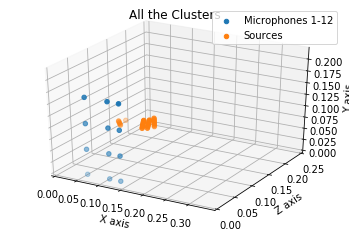

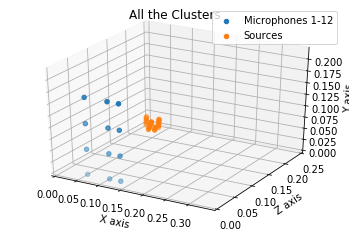

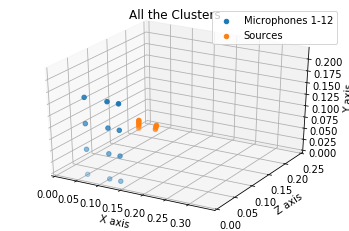

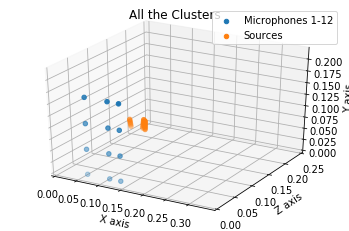

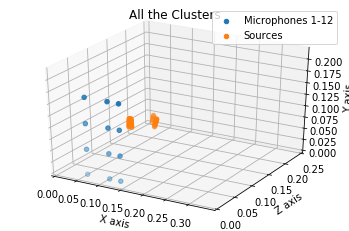

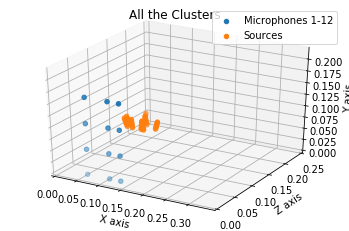

In [103]:
def main():

    """ Runs through all the combinations of the speed of sound, the combination numbers, the full sound list,
        all the distance methods recoverts 
    """
    c = [30]  # speed of sound
    combinations_number = 3

    cycles = ['Cycle'+str(i) for i in [0,1]] #range(6,24) 
    soundSources = ['S'+str(i) for i in range(1,2)] #range(1,3)
    sound_list = [soundSource+'_'+cycle for soundSource in soundSources for cycle in cycles]

    # Test all the algorithms available
    algo_names = ['MUSIC', 'TOPS', 'SRP'] #['SRP','TOPS', 'MUSIC']
    for source_name in sound_list:
        for sound_speed in c:
            for algo_name in algo_names:
                
                #mic_3_S1_Cycle0_sound_source_localization_c30_SRP_KDTREE_DEBUG_test_multithread.csv
                #filename = 'mic_'+str(combinations_number)+'_'+str(source_name)+'_sound_source_localization_c'+str(sound_speed)+'_'+str(algo_name)+'_KDTREE_DEBUG_3_numscr_2_test_multithread'
                filename = 'mic_'+str(combinations_number)+'_'+str(source_name)+'_sound_source_localization_c'+str(sound_speed)+'_'+str(algo_name)+'_KDTREE_DEBUG_3_test_multithread'
                # Read in the csv data file and skip the first row of coumn headers
                df = pd.read_csv('Clusters/'+filename+'.csv', skiprows=0)
                A = df.values
                # Now depending on how the data is: 
#                 df = df.dropna(axis=1)
#                 new_df = df.values.reshape(1,3)
                
                # Otherwise: 
                # Create an empty array A with the same number of rows as df (the dataframe)
#                 A = np.empty([len(df),3], dtype=np.float64)
                
                # Remove the inner most brackets for each point, so to have one NumPy array
#                 # If it's that string bullshit
#                 for i in range(0, len(df)):
#                     A[i,:] = np.array([data.replace(r'[','').replace(r']','') for data in df.iloc[i]])    
        
                # Check if name is S2
                if source_name in ['S'+str(i)+'_'+'Cycle'+str(j) for i in range(2,3) for j in range(1,24)]:
                    S1_bool = False
                else:
                    S1_bool = True

#                 # Reconvert the coordinates and plot them
# #                 reconvert(filename, new_df)
                reconvert(filename, S1_bool, A)
    
                                  
if __name__ == '__main__':
    main()

In [ ]:
# Cluster 1
[[0.13115697 0.08202748 0.09149023]
 [0.13176806 0.08495704 0.09170066]
 [0.13237915 0.08788659 0.0919111 ]
 [0.13299025 0.09081614 0.09212153]
 [0.13360134 0.09374569 0.09233197]
 [0.13421243 0.09667525 0.09254241]
 [0.13482353 0.0996048  0.09275284]
 
 [0.07484481 0.08101383 0.085598  ]
 [0.07353809 0.08371429 0.085598  ]
 [0.07223138 0.08641475 0.085598  ]
 [0.07092466 0.08911521 0.085598  ]
 
 [0.07135456 0.08262211 0.103886  ]
 [0.12289891 0.08221737 0.08707219]
 [0.12351142 0.0851537  0.08712484]
 [0.12412393 0.08809004 0.08717749]
 [0.12473643 0.09102637 0.08723014]
 [0.12534894 0.09396271 0.08728279]
 [0.12596145 0.09689904 0.08733544]
 
 [0.12657396 0.09983538 0.08738809]
 
 [0.13654283 0.08096201 0.103886  ]
 [0.13645095 0.0839606  0.103886  ]
 [0.13635908 0.0869592  0.103886  ]
 [0.13626721 0.08995779 0.103886  ]
 [0.13617534 0.09295638 0.103886  ]
 [0.13608347 0.09595497 0.103886  ]
 [0.1359916  0.09895357 0.103886  ]]


# Cluster 2
[[0.14857271 0.08196304 0.09001876]
 [0.1492101  0.08489029 0.09017664]
 [0.1498475  0.08781754 0.09033453]
 [0.13592259 0.0815427  0.08865121]
 [0.13696307 0.08435452 0.08875649]
 [0.13800355 0.08716634 0.08886178]
 [0.13904403 0.08997815 0.08896706]
 [0.14008451 0.09278997 0.08907234]
 [0.14112499 0.09560179 0.08917763]
 [0.14216547 0.0984136  0.08928291]
 
 [0.14574944 0.08072025 0.103886  ]
 [0.14599855 0.08370989 0.103886  ]
 [0.14624767 0.08669953 0.103886  ]
 [0.14649678 0.08968917 0.103886  ]
 [0.1467459  0.09267881 0.103886  ]
 [0.14699501 0.09566845 0.103886  ]
 [0.14724413 0.09865809 0.103886  ]
 [0.11794338 0.0809062  0.103886  ]
 [0.11808771 0.08390272 0.103886  ]
 [0.11823205 0.08689925 0.103886  ]
 [0.11837638 0.08989578 0.103886  ]
 [0.11852072 0.0928923  0.103886  ]
 [0.11866505 0.09588883 0.103886  ]
 [0.11880939 0.09888535 0.103886  ]]

In [107]:
# Cluster 3
b1 = np.array([[0.11652684, 0.08096201, 0.085598],
 [0.11661871, 0.0839606, 0.085598],
 [0.11671058, 0.0869592, 0.085598],
 [0.11680245, 0.08995779, 0.085598],
 [0.11689432, 0.09295638, 0.085598],
 [0.11698619, 0.09595497, 0.085598],
 [0.11707806, 0.09895357, 0.085598]])

print(b1.mean(axis=0))
 
b2 = np.array([[0.14781255, 0.08191362,0.09295988],
 [0.14842279, 0.08483911,0.0932228 ],
 [0.14903304, 0.08776459,0.09348573],
 [0.14964328, 0.09069008,0.09374865]])

print(b2.mean(axis=0))

dist_center_c = np.sqrt(sum((b1.mean(axis=0)-b2.mean(axis=0))**2))*100
dist_center_c

[0.11680245 0.08995779 0.085598  ]
[0.14872791 0.08630185 0.09335426]


3.3056933449043777

In [ ]:
# Cluster 4
[[0.12075587 0.08052142 0.09127979]
 [0.12100437 0.0835037  0.09149023]
 [0.12125287 0.08648597 0.09170066]
 [0.12150138 0.08946825 0.0919111 ]
 
 [0.12174988 0.09245052 0.09212153]
 [0.12199838 0.0954328  0.09233197]
 [0.12224688 0.09841507 0.09254241]
 
 [0.09905789 0.08265196 0.085598  ]
 [0.09852259 0.08560382 0.085598  ]
 [0.09798728 0.08855567 0.085598  ]
 [0.09745198 0.09150753 0.085598  ]
 [0.09691668 0.09445938 0.085598  ]
 [0.09638138 0.09741124 0.085598  ]
 
 [0.12966262 0.08098055 0.08701954]
 [0.12962325 0.08397983 0.08707219]
 [0.12958388 0.08697911 0.08712484]
 [0.1295445  0.08997839 0.08717749]
 [0.12950513 0.09297767 0.08723014]
 [0.12946576 0.09597695 0.08728279]
 [0.12942639 0.09897623 0.08733544]]

In [114]:
# Cluster 5
b1 = np.array([[0.09438172,0.08082561,0.085598],
 [0.09457848,0.08381915,0.085598],
 [0.09477523,0.08681269,0.085598],
 [0.09497199,0.08980623,0.085598],
 [0.09516874,0.09279977,0.085598],
 [0.0953655,0.09579331,0.085598],
 [0.09556225,0.09878685,0.085598] ,
[0.10043628,0.08082561,0.085598],
 [0.10023952,0.08381915,0.085598],
 [0.10004277,0.08681269,0.085598],
 [0.09984601,0.08980623,0.085598],
 [0.09964926,0.09279977,0.085598],
 [0.0994525,0.09579331,0.085598],
 [0.09925575,0.09878685,0.085598]])

print(b1.mean(axis=0)) 
 

b2 = np.array([[0.1231474,0.0828686,0.11417993],
 [0.12347244,0.0858282,0.11454757],
 [0.12379748,0.08878779,0.11491521],
 [0.12412252,0.09174738,0.11528285],
 [0.12444756,0.09470698,0.11565049],
 [0.1247726,0.09766657,0.11601813]])

print(b2.mean(axis=0))

b3 = np.array([[0.13690923,0.08082876,0.103886],
 [0.13772576,0.0837155,0.103886],
 [0.13854229,0.08660224,0.103886],
 [0.13935883,0.08948898,0.103886],
 [0.14017536,0.09237572,0.103886],
 [0.14099189,0.09526246,0.103886],
 [0.14180842,0.09814921,0.103886]])

print(b3.mean(axis=0))

dist_center_c = np.sqrt(sum((b1.mean(axis=0)-b2.mean(axis=0))**2))*100

b1_b2 = np.array([[0.097409,0.08980623,0.085598],
[0.12396,0.09026759,0.11509903]])

room_dim = np.array([0.34925,0.219964,0.2413]) #[13.75,8.66,9.5] # Width,Depth , Length
centerlist = (room_dim)/2
mean_b1_b2= b1_b2.mean(axis=0)
np.subtract(mean_b1_b2, centerlist)

[0.097409   0.08980623 0.085598  ]
[0.12396    0.09026759 0.11509903]
[0.13935883 0.08948898 0.103886  ]


array([-0.0639405 , -0.01994509, -0.02030148])

In [ ]:
# Cluster 6
[[0.1221841  0.08059018 0.085598  ]
 [0.12248549 0.083575   0.085598  ]
 [0.12278689 0.08655982 0.085598  ]
 [0.12308829 0.08954464 0.085598  ]
 [0.12338969 0.09252946 0.085598  ]
 [0.12369109 0.09551429 0.085598  ]
 [0.12399249 0.09849911 0.085598  ]
 [0.10239128 0.08015709 0.085598  ]
 [0.10195961 0.08312588 0.085598  ]
 [0.10152794 0.08609466 0.085598  ]
 [0.10109627 0.08906344 0.085598  ]
 [0.10066461 0.09203222 0.085598  ]
 [0.10023294 0.095001   0.085598  ]
 [0.09980127 0.09796978 0.085598  ]
 
 [0.14706728 0.08192067 0.09442726]
 [0.14765091 0.08484641 0.09474259]
 [0.14823454 0.08777214 0.09505792]
 [0.14881817 0.09069788 0.09537325]
 [0.1494018  0.09362362 0.09568859]
 [0.14998543 0.09654936 0.09600392]
 
 [0.10353171 0.08272488 0.1170993 ]
 [0.10375188 0.08567934 0.1175712 ]
 [0.10397204 0.0886338  0.1180431 ]
 [0.10419221 0.09158826 0.11851501]
 [0.10441238 0.09454272 0.11898691]
 [0.10463255 0.09749718 0.11945881]
 
 [0.08861955 0.08211608 0.09001876]
 [0.0880078  0.0850488  0.09017664]
 [0.08739605 0.08798151 0.09033453]
 [0.08678429 0.09091423 0.09049241]
 [0.08617254 0.09384695 0.09065029]
 [0.08556078 0.09677966 0.09080818]
 [0.08494903 0.09971238 0.09096606]
 
 [0.11971783,0.08175144 0.103886  ]
 [0.11902835,0.08467113 0.103886  ]
 [0.11833887,0.08759083 0.103886  ]
 [0.11764939,0.09051052 0.103886  ]
 [0.11695991,0.09343022 0.103886  ]
 [0.11627042,0.09634991 0.103886  ]
 [0.11558094,0.0992696  0.103886  ]

 
 np.array([ [0.09072814,0.08105207 0.085598  ],[0.08963794,0.08384696,0.085598]
 [0.08854773,0.08664186,0.085598],
 [0.08745753,0.08943676,0.085598],
 [0.08636733,0.09223166,0.085598],
 [0.08527713,0.09502656,0.085598],
 [0.08418693,0.09782146,0.085598],
 [0.12736828,0.08015709,0.085598],
 [0.12693661,0.08312588,0.085598],
 [0.12650494,0.08609466,0.085598],
 [0.12607327,0.08906344,0.085598],
 [0.12564161,0.09203222,0.085598],
 [0.12520994,0.095001,0.085598],
 [0.12477827,0.09796978,0.085598]])

In [91]:
import numpy as np

# First cluster
b = np.array([[0.13628521,0.06531793,0.140462],[0.13725211,0.06815784,0.140462],[0.13821902,0.07099775,0.140462],[0.13918593,0.07383766,0.140462],[0.14015284,0.07667757,0.140462],[0.14111974,0.07951748,0.140462],[0.14208665,0.0823574,0.140462],[0.14305356,0.08519731,0.140462],[0.14402047,0.08803722,0.140462],[0.14498737,0.09087713,0.140462],[0.14595428,0.09371704,0.140462]])
mean_b = b.mean(axis=0)


# Middle Cluster
d1 = np.array([[0.07800647,0.06622817,0.140462],
 [0.07716471,0.06910765,0.140462],
 [0.07632295,0.07198714,0.140462],
 [0.07548118,0.07486662,0.140462],
 [0.07463942,0.07774611,0.140462],
 [0.07379766,0.08062559,0.140462],
 [0.0729559,0.08350508,0.140462],
 [0.07211414,0.08638456,0.140462],
 [0.07127237,0.08926405,0.140462],
 [0.07043061,0.09214353,0.140462]])

mean_d1 = d1.mean(axis=0) # Pulmonary
 
d2 = np.array([[0.09798275,0.0676474,0.14425122],[0.0969677,0.07046605,0.1444091],[0.09595264,0.07328469,0.14456699],[0.09493759,0.07610333,0.14472487],[0.09392254,0.07892197,0.14488276],[0.09290749,0.08174061,0.14504064],[0.09189244,0.08455925,0.14519853],[0.09087738,0.0873779,0.14535641],[0.08986233,0.09019654,0.14551429],[0.08884728,0.09301518,0.14567218]])
mean_d2 = d2.mean(axis=0) # Aortic

#print(np.vstack([mean_d1, mean_d2]))

mean_of_d1_d2 = mean_d1_d2 = np.mean(np.vstack([mean_d1, mean_d2]), axis=0)
room_dim = np.array([0.34925,0.219964,0.2413]) #[13.75,8.66,9.5] # Width,Depth , Length
centerlist = (room_dim)/2

np.subtract(mean_of_d1_d2, centerlist)

# Last Cluster
# c_outliers = np.array([[0.14533387,0.06619923,0.16332864], [0.14727402,0.06848196,0.16348653], [0.14921418,0.0707647,0.16364441]])
# c1 = np.array([[0.09016185,0.06560553,0.15875],[0.08983434,0.0685876,0.15875],[0.08950684,0.07156967,0.15875],[0.08917933,0.07455174,0.15875],[0.08885182,0.07753381,0.15875],[0.08852432,0.08051588,0.15875],[0.08819681,0.08349795,0.15875],[0.0878693,0.08648002,0.15875],[0.0875418,0.08946209,0.15875],[0.08721429,0.09244416,0.15875]])  
# c2 = np.array([[0.09246224,0.0658175,0.140462],[0.0922393,0.0688092,0.140462],[0.09201635,0.07180091,0.140462],[0.09179341,0.07479261,0.140462],[0.09157047,0.07778432,0.140462],[0.09134752,0.08077602,0.140462],[0.09112458,0.08376773,0.140462],[0.09090164,0.08675943,0.140462],[0.09067869,0.08975114,0.140462],[0.09045575,0.09274284,0.140462]])
# mean_c1 = c1.mean(axis=0)
# mean_c2 = c2.mean(axis=0)

# #print(mean_b,mean_d1,mean_d2, mean_c1, mean_c2)


# dist_d = np.sqrt(sum((mean_d1-mean_d2)**2))*100
# dist_c = np.sqrt(sum((mean_c1-mean_c2)**2))*100
#dist_d

array([-0.09080822, -0.03022343,  0.02206185])

In [ ]:


import numpy as np

t_valve_location = np.array([0.10-0.015, 0.13-0.0175, 0.086])
m_valve_location = np.array([0.1+0.015, 0.13+0.012, 0.095])
a_valve_location = np.array([0.10+0.05, 0.13, 0.10])
p_valve_location = np.array([0.10-0.08, 0.13, 0.10])
room_dim = np.array([0.34925,0.219964,0.2413]) #[13.75,8.66,9.5]
centerlist = (room_dim)/2

In [89]:
room_dim = np.array([0.34925,0.219964,0.2413]) #[13.75,8.66,9.5] # Width,Depth , Length
centerlist = (room_dim)/2

# Microphone x,y,z locations
x_locations = [-0.102235, -0.052197, -0.027304]
y_locations = [-0.109982]
z_locations = [0.056388, 0.001524, -0.053340, -0.108204]

# Create the microphone array for scatter plot
microphone_locations = [[x,y,z] for x in x_locations for y in y_locations for z in z_locations]

# Add the locations
microphone_source_locations = np.add(centerlist, np.array(microphone_locations))
microphone_source_locations

b = np.subtract(microphone_source_locations, centerlist)
b

array([[-0.102235, -0.109982,  0.056388],
       [-0.102235, -0.109982,  0.001524],
       [-0.102235, -0.109982, -0.05334 ],
       [-0.102235, -0.109982, -0.108204],
       [-0.052197, -0.109982,  0.056388],
       [-0.052197, -0.109982,  0.001524],
       [-0.052197, -0.109982, -0.05334 ],
       [-0.052197, -0.109982, -0.108204],
       [-0.027304, -0.109982,  0.056388],
       [-0.027304, -0.109982,  0.001524],
       [-0.027304, -0.109982, -0.05334 ],
       [-0.027304, -0.109982, -0.108204]])

In [8]:
dist_center_c = np.sqrt(sum((c-center)**2))*100
dist_center_c

NameError: name 'c' is not defined

In [308]:
room_dim = np.array([0.34925,0.219964,0.2413]) #[13.75,8.66,9.5]
centerlist = (room_dim)/2
S1_source = np.array([0.1375,0.10,0.0905])
S2_source = np.array([0.15, 0.15, 0.076])
source1 = centerlist - S1_source#np.subtract(centerlist, S1_source)
source2 = np.subtract(centerlist, S2_source)
source1

array([0.037125, 0.009982, 0.03015 ])